In [6]:
pip install Graphviz

In [24]:
import pandas as pd 
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed=10

In [27]:
from sklearn import datasets
iris=datasets.load_iris()
df=pd.read_csv('C:\\Users\\2\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv',
               delimiter=',',
               header=0,
              
              names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Variety'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
le = LabelEncoder()
le.fit(df['Variety'].values)
y=le.transform(df['Variety'].values)
X=df.drop('Variety', axis=1).values
#x,y x is 4 column y is variaty coulmn test size 34% get us the more accurate result,staratify for 
#alance seed is 10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.34,stratify=y , random_state=seed)

In [35]:
tree=DecisionTreeClassifier(criterion='gini',
                           min_samples_leaf=5,
                           min_samples_split=5,
                            max_depth=None,
                            random_state=seed)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9615384615384616


Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


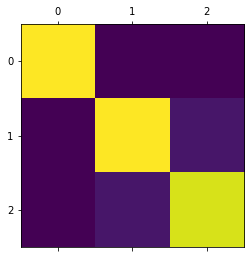

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 


print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [ ]:
## lab_9 ,part_2

In [40]:
import os 
os.environ[""]+= os.pathsep + 'C:/Program Files '
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names=['setosa','virginica','Versicolour']
    
    graph_data= export_graphviz(tree,
                               feature_names=dataframe.drop(label_col,axis=1).columns,
                                class_names=label_names,
                                filled=True,
                                rounded=True,
                                out_file=None)
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph
tree_graph = plot_tree(tree, df, 'Variety', le, 'Iris')
tree_graph

KeyError: 'C:\\Users\\2\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [ ]:
from sklearn.naive_bayes import GaussianNB,
BernoulliNB